In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class HopfieldNetwork:
    
    '''
    Base class for hopfield network
    '''
    
    def __init__(self,inputstate,iterations=100,thresh=0,tol=1e-10):
        
        
        self.learnedState = inputstate
        self.W = self._hebbian()
        
        self.iter = iterations
        self.thresh = thresh
        self.tol = tol
        
    
    def predict(self,alteredstate):
        
        s = altered_state
        energyVecDiff = []
        energyVec = [calculateEnergy(s)]
        
        for i in range(1,self.iter):
            
            for j in range(100):
                
                #choose random starting point
                j = np.random.randint(len(s)-1)
                
                #value of node at j
                s[j] = np.sign(self.W[j].T @ s - self.thresh)
            
            E = self._calculateEnergy(s)
            energyVec.append(E)
            energyVecDiff.append(E-energyVec[i-1])
        
        return s, energyVec, energyDiff
    
    
    def _calculateEnergy(self,s):
        
        energy = -0.5 * s @ self.W @ s + np.sum(s * self.thresh)
        
        return energy 
        
    def _hebbian(self):
        
        v = self.learnedState.copy()
        
        weights = np.zeros([len(v),len(v)])
        weights += np.outer(v,v)
        weights = weights - np.diag(np.diag(weights))
        
        return weights
   

In [17]:
class HopfieldWord(HopfieldNetwork):
    
    '''
    Hopfield network that will learn the representation of a word
    than then converge to that word given some input
    '''
    
    def __init__(self,inputword,iterations=100,thresh=0,pad=100):
        
        self.pad = pad
        self.inputword = inputword
        inputstate = self._word2vec(inputword)
        
        HopfieldNetwork.__init__(self,inputstate,iterations=iterations,thresh=thresh)
        
    
    def predict(self, alteredword):
        
        altered_state = self._word2vec(alteredword)
        
        s = altered_state
        energyVecDiff = []
        energyVec = [self._calculateEnergy(s)]
        
        for i in range(1,self.iter):
            
            for j in range(100):
                
                #choose random starting point
                j = np.random.randint(len(s)-1)
                
                #value of node at j
                s[j] = np.sign(self.W[j].T @ s - self.thresh)
            
            E = self._calculateEnergy(s)
            energyVec.append(E)
            energyVecDiff.append(E-energyVec[i-1])
            
            temp_word = self._vec2word(s)
            print('ITER: %i ---- STATE: %s' %(i,temp_word))
            
            #if abs(E-energyVec[i-1]) < tol:
            if temp_word == self.inputword:
                return temp_word, energyVec, energyVecDiff
            
        raise RuntimeError("Did not converge in %i iterations" %self.iter)
        
    
    def _word2vec(self,word):
             
        if self.pad < len(word):
            raise ValueError('pad %i > length of input %s (%i)' %(self.pad,word,len(word)))

        mat = np.full([self.pad,26],-1)

        for i, char in enumerate(word):
            idx = ord(char) - ord('a')
            mat[i,idx] = 1

        return np.reshape(mat,self.pad*26)
    
    def _vec2word(self,vec):
        
        mat = np.reshape(vec,[self.pad,26])
        m,n = np.shape(mat)
    
        word = ''
        for i in range(m):
            idx = np.where(mat[i,:]==1)[0]
            if len(idx) == 1:
                idx=idx[0]
                letter = chr(ord('a')+idx)
                word += letter
    
        return word
        
             

In [18]:
network = HopfieldWord("imafirestarter")

In [19]:
out, Evec, Ediff = network.predict("helloworld")

ITER: 1 ---- STATE: elloworld
ITER: 2 ---- STATE: lloworld
ITER: 3 ---- STATE: lloworld
ITER: 4 ---- STATE: lloworld
ITER: 5 ---- STATE: lloworld
ITER: 6 ---- STATE: lloworld
ITER: 7 ---- STATE: loworld
ITER: 8 ---- STATE: loorld
ITER: 9 ---- STATE: loorld
ITER: 10 ---- STATE: loorld
ITER: 11 ---- STATE: loorl
ITER: 12 ---- STATE: loorl
ITER: 13 ---- STATE: loorlr
ITER: 14 ---- STATE: lfoorlrr
ITER: 15 ---- STATE: ilforoslrr
ITER: 16 ---- STATE: ilfroslrr
ITER: 17 ---- STATE: ilfroslrr
ITER: 18 ---- STATE: ilfroslrr
ITER: 19 ---- STATE: ilfroslrr
ITER: 20 ---- STATE: ilfroslrr
ITER: 21 ---- STATE: ilfroslrr
ITER: 22 ---- STATE: ilfroslrr
ITER: 23 ---- STATE: ilfroslrr
ITER: 24 ---- STATE: ilfroslrr
ITER: 25 ---- STATE: ilfroslrr
ITER: 26 ---- STATE: ilfrosrr
ITER: 27 ---- STATE: ilfrosrtr
ITER: 28 ---- STATE: ilfrosrtr
ITER: 29 ---- STATE: ilfrosrtr
ITER: 30 ---- STATE: ilfrosrtr
ITER: 31 ---- STATE: ilfrsrtr
ITER: 32 ---- STATE: ilfrsrtr
ITER: 33 ---- STATE: ilfresrtr
ITER: 34 ---- ST

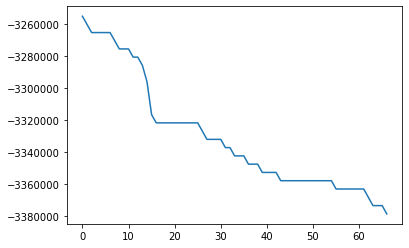

In [20]:
plt.plot(Evec)